# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
country = []
rating = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    h3_elements = parsed_content.find_all('h3', class_='text_sub_header userStatusWrapper')
    # Loop through the h3 elements and extract span text
    for h3_element in h3_elements:
        country.append(h3_element.get_text().split('(')[-1].split(')')[0].strip())
        
    span_elements = parsed_content.find_all('div', itemprop='reviewRating') 
    # Find the <div> element
    for span_element in span_elements:
        rating_spans = span_element.find_all('span', itemprop='ratingValue')  # Find <span> elements within the <div>
        for span in rating_spans:
            rating.append(span.text)

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df["country"] = country
df["rating"] = rating
df.head()

,reviews,country,rating
0,Not Verified | BA cancelled our flight and co...,United Kingdom,1
1,✅ Trip Verified | When on our way to Heathrow ...,United Kingdom,1
2,"✅ Trip Verified | Nice flight, good crew, very...",United States,8
3,✅ Trip Verified | 8 months have passed and st...,Canada,1
4,✅ Trip Verified | In June my flight was cance...,Denmark,1


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df["rating"]=df["rating"].astype(int)

### What is the average  rating given to British Airways?

In [5]:
# This is rating based on the latest 1000 reviews

In [6]:
print(round(df.rating.mean()))

4


### Show Percentage Distribution of Ratings

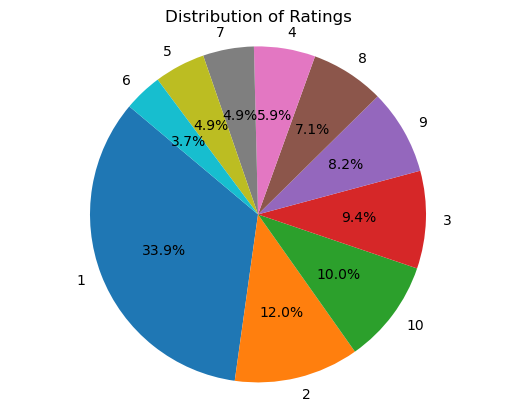

In [7]:
value_counts = df['rating'].value_counts()
percentage_values = (value_counts / value_counts.sum()) * 100

# Create a pie chart
plt.pie(percentage_values, labels=percentage_values.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ratings')
plt.show()

### What is the total counts for each rating?

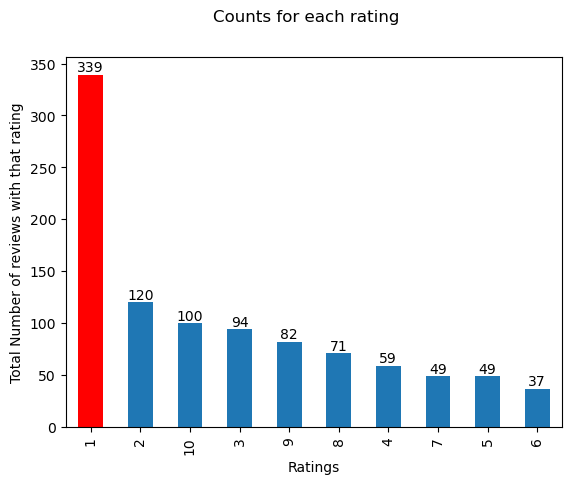

In [8]:
value_counts = df['rating'].value_counts()

# Create a bar plot
ax= value_counts.plot(kind='bar')
ax.patches[0].set_facecolor('red')

max_index = value_counts.idxmax()
# Display the count on each bar
for index, value in enumerate(value_counts):
    ax.text(index, value + 0.2, str(value), ha='center', va='bottom', )

plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each rating")
plt.show()

### Citizens of Which Country Posted the Most Reviews

In [9]:
top_countries =df['country'].value_counts().head(10)

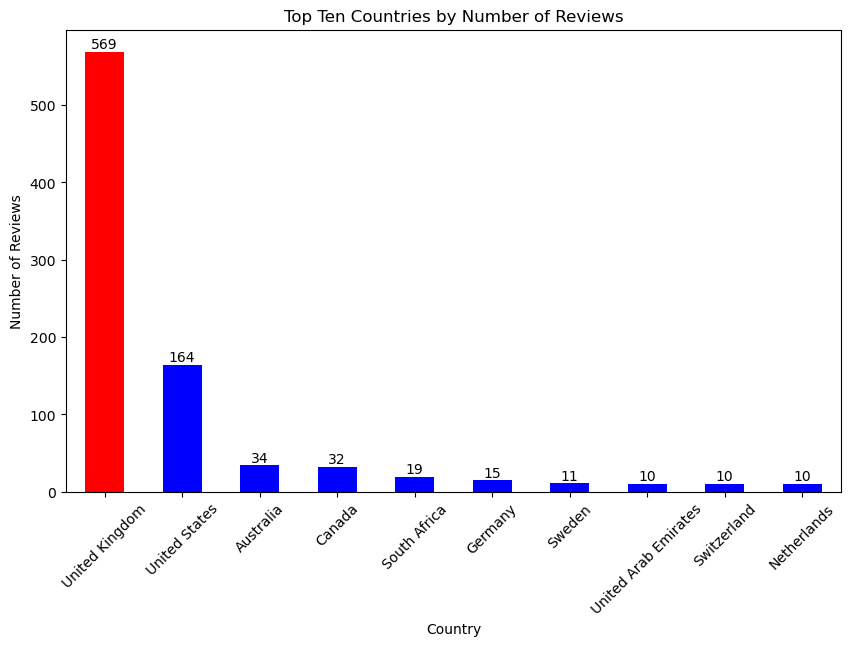

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_countries.plot(kind='bar',color = ['red'] + ['blue'] * (len(top_countries) - 1))

for index, value in enumerate(top_countries):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')
plt.title('Top Ten Countries by Number of Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

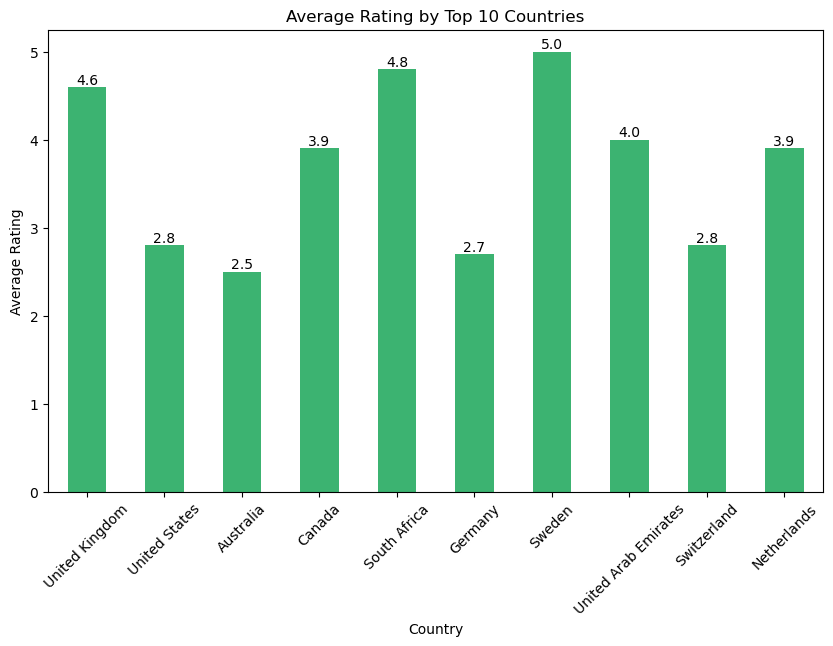

In [11]:
# Calculate average rating for each country
top_countries = df['country'].value_counts().head(10).index
country_avg_rating = df.groupby('country')['rating'].mean().round(1).loc[top_countries]
plt.figure(figsize=(10, 6))
for index, value in enumerate(country_avg_rating):
    plt.text(index, value , str(value), ha='center', va='bottom')
country_avg_rating.plot(kind='bar', color='mediumseagreen')
plt.title('Average Rating by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### Australians seem most disastisfied with British Airways

In [12]:
import seaborn as sns

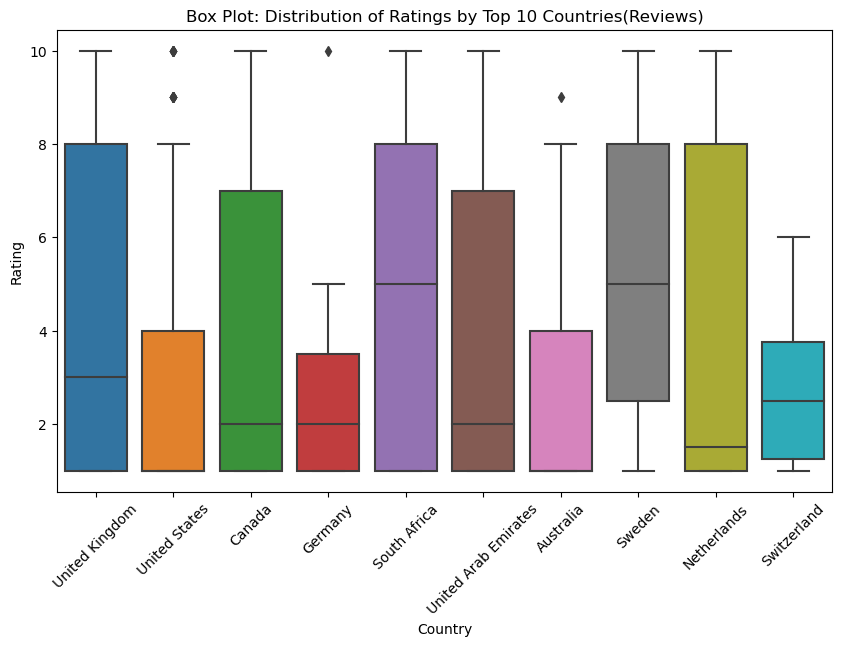

In [13]:
# Create a box plot
df_top_countries = df[df['country'].isin(top_countries)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='rating', data=df_top_countries)
plt.title('Box Plot: Distribution of Ratings by Top 10 Countries(Reviews)')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Calculate IQR for each country's ratings
iqr_per_country = df_top_countries.groupby('country')['rating'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)).sort_values()

# Print countries with the least variability (most consistent ratings)
print("Countries with Most Consistent Ratings:")
print(iqr_per_country)

Countries with Most Consistent Ratings:
country
Germany                 2.5
Switzerland             2.5
Australia               3.0
United States           3.0
Sweden                  5.5
Canada                  6.0
United Arab Emirates    6.0
Netherlands             7.0
South Africa            7.0
United Kingdom          7.0
Name: rating, dtype: float64


### Ratings by citizens of UK is the most inconsistent and varies greatly

In [15]:
# Filter data for UK
uk_ratings = df[df['country'] == 'United Kingdom']['rating']

# Calculate value counts of each rating
rating_counts_uk = uk_ratings.value_counts().sort_index()

print("Value Counts of Ratings in the UK:")
print(rating_counts_uk)

Value Counts of Ratings in the UK:
rating
1     162
2      61
3      62
4      37
5      30
6      19
7      34
8      48
9      57
10     59
Name: count, dtype: int64


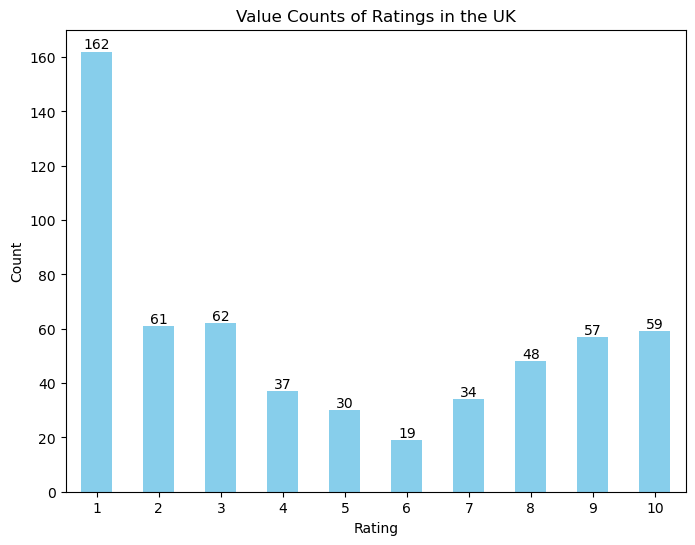

In [16]:
# Create a bar graph
plt.figure(figsize=(8, 6))
rating_counts_uk.plot(kind='bar', color='skyblue')
for index, value in enumerate(rating_counts_uk):
    plt.text(index, value , str(value), ha='center', va='bottom')
plt.title('Value Counts of Ratings in the UK')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

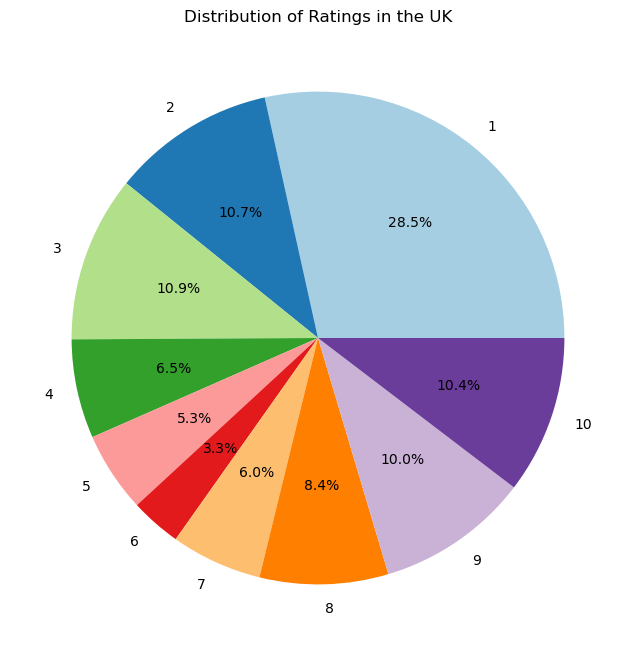

In [17]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts_uk, labels=rating_counts_uk.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings in the UK')
plt.show()

### Inference: a quarter of travellers fromUK is extremently disastisfied by British Airways, while a 1 in 10  gives it the best rating 

In [18]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [19]:
df

,reviews,country,rating
0,BA cancelled our flight and could not book u...,United Kingdom,1
1,When on our way to Heathrow Airport and merel...,United Kingdom,1
2,"Nice flight, good crew, very good seat, food ...",United States,8
3,8 months have passed and still wasting my ti...,Canada,1
4,In June my flight was cancelled within three...,Denmark,1
...,...,...,...
995,London to Munich. The ground staff were very...,Germany,4
996,"London to Cape Town. Waiting at gate, the s...",France,2
997,Full flight from MUC to LHR with British Airw...,Germany,5
998,Manchester to Philadelphia via London. MAN-L...,United Kingdom,9


In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

filtered_paras = []
def clean_text(text):
    # Convert to lowercase
    global filtered_documents
    
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_paras = [[word for word in tokens if word not in stop_words] for token in text]

    # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

# Example text
df["cleaned_reviews"] = df['reviews'].apply(clean_text)
df["cleaned_reviews"].head()

0    ba cancelled flight could book us onto flight ...
1    way heathrow airport merely half hours schedul...
2    nice flight good crew good seat food would exp...
3    months passed still wasting time ba team shari...
4    june flight cancelled within three hours depar...
Name: cleaned_reviews, dtype: object

In [21]:
# pip install gensim
# print(filtered_documents)

In [22]:
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [23]:
dictionary = corpora.Dictionary(filtered_paras)
corpus = [dictionary.doc2bow(doc) for doc in filtered_paras]

In [24]:
# Train the LDA model
num_topics = 3  # You can adjust the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their keywords
for topic_id in range(num_topics):
    print(f"Topic {topic_id + 1}: {lda_model.print_topic(topic_id)}")

Topic 1: 0.033*"purple" + 0.033*"existant" + 0.032*"old" + 0.031*"none" + 0.031*"another" + 0.030*"security" + 0.030*"would" + 0.030*"everywhere" + 0.029*"awaited" + 0.029*"connecting"
Topic 2: 0.032*"agents" + 0.032*"connection" + 0.032*"interior" + 0.031*"old" + 0.030*"meals" + 0.030*"bangkok" + 0.030*"non" + 0.029*"service" + 0.029*"arrival" + 0.029*"screen"
Topic 3: 0.032*"told" + 0.031*"partner" + 0.031*"small" + 0.030*"experience" + 0.030*"bad" + 0.030*"upon" + 0.029*"track" + 0.029*"ife" + 0.029*"rebooked" + 0.028*"fast"


In [25]:
#pip install pyLDAvis

In [26]:
import pyLDAvis.gensim

# Create the visualization
lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization in a web browser
pyLDAvis.display(lda_visualization)

In [27]:
#pip install textblob

In [28]:
#pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis for each entry
analyzer = SentimentIntensityAnalyzer()

def vadersentimentscore(review):
    sentiment_scores = analyzer.polarity_scores(review)
    return sentiment_scores['compound']

# function to analyse
def vader_analysis(compound):
    sentiment_label = "Positive" if compound > 0 else ("Negative" if compound < 0 else "Neutral")
    return sentiment_label

df['Sentiment'] = df['cleaned_reviews'].apply(vadersentimentscore)
df['Sentiment Label'] = df['Sentiment'].apply(vader_analysis)

In [30]:
vader_counts = df['Sentiment Label'].value_counts()
vader_counts

Sentiment Label
Positive    573
Negative    422
Neutral       5
Name: count, dtype: int64

## Visual Representation

([<matplotlib.patches.Wedge at 0x21269ddca90>,
 [Text(-0.25006438374722184, 1.071199236361342, 'Positive'),
  Text(0.23320788371879253, -1.0749949223002881, 'Negative'),
  Text(1.3498334544781063, -0.021204838403116367, 'Neutral')],
 [Text(-0.13639875477121188, 0.584290492560732, '57.3%'),
  Text(0.12720430021025045, -0.586360866709248, '42.2%'),
  Text(0.8498951380047335, -0.013351194550110301, '0.5%')])

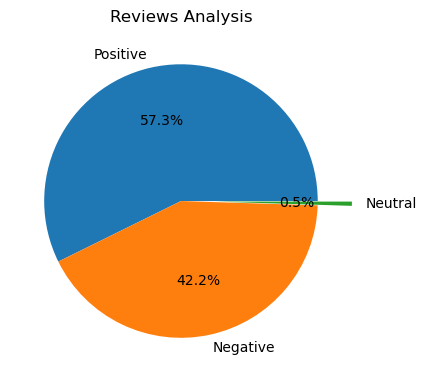

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [32]:
#pip install wordcloud

C:\Users\Syed Parvez\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


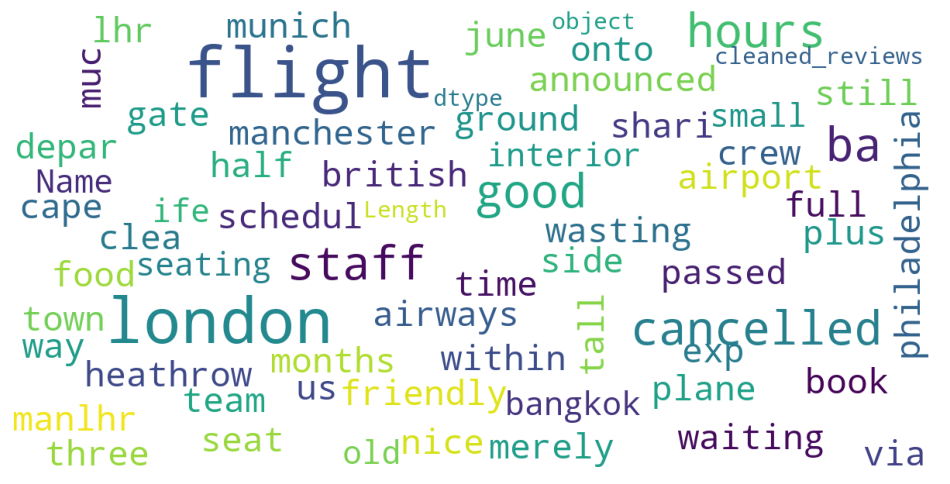

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.cleaned_reviews)

In [34]:
df.to_csv("BA_reviews.csv")